
<h1>Introduction to Quantum Computing - All About Qubits<h1>

The following notebook contains the codercises for "Introduction to Quantum Computing", "Single-Qubit Gates", "Circuits with Many Qubits"

In [6]:
## import libarries
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

In [7]:
## Codercise I.1.1 - Normalization of quantum states. 


# from math import sqrt

# Here are the vector representations of |0> and |1>, for convenience
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])


def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        np.array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """

    ##################
    # YOUR CODE HERE #

    
    constant = (1/((abs(alpha)**2)+(abs(beta)**2)))**(0.5)
    
    alpha_2 = alpha*constant
    beta_2 = beta*constant

    ans = alpha_2**2 + beta_2**2

    pa = np.array([alpha_2, beta_2])

    return pa
    ##################

    # CREATE A VECTOR [a', b'] BASED ON alpha AND beta SUCH THAT |a'|^2 + |b'|^2 = 1

    # RETURN A VECTOR
    pass


In [8]:
# Codercise I.1.2 - Inner Product and Orthonormal Bases

def inner_product(state_1, state_2):
    """Compute the inner product between two states.

    Args:
        state_1 (np.array[complex]): A normalized quantum state vector
        state_2 (np.array[complex]): A second normalized quantum state vector

    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # COMPUTE AND RETURN THE INNER PRODUCT

    #assuming therea are only two states.

    inner_prod = np.dot(np.conjugate(np.transpose(state_1)), state_2)

    
    return inner_prod


# Test your results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")


<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1


In [9]:
# Codercise I.1.3 - Sampling Measurement Outcomes.

def measure_state(state, num_meas):
    """Simulate a quantum measurement process.

    Args:
        state (np.array[complex]): A normalized qubit state vector.
        num_meas (int): The number of measurements to take. 

    Returns:
        np.array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability
        distribution defined by the input state.
    """

    ##################
    # YOUR CODE HERE #

    prob_1 = (np.abs(state[0]**2)) # calculating probability
    prob_2 = (np.abs(state[1]**2)) # calkculating probability
    
    print(prob_1)
    print(prob_2)

    ans = np.random.choice(2, size = num_meas, p =[prob_1, prob_2]) #generating random array of O and 1 with p probability. 


    return ans
    
    ##################

    # COMPUTE THE MEASUREMENT OUTCOME PROBABILITIES

    # RETURN A LIST OF SAMPLE MEASUREMENT OUTCOMES

    pass

ex = measure_state([0.8,0.6], 10)
print(ex)

0.6400000000000001
0.36
[0 0 1 0 0 0 0 0 0 0]


In [10]:
# Codercise I.1.4 - Applying a quantum operation

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def apply_u(state):
    """Apply a quantum operation.

    Args:
        state (np.array[complex]): A normalized quantum state vector.

    Returns:
        np.array[complex]: The output state after applying U.
    """

    ##################
    # YOUR CODE HERE #

    new_state = np.dot(U,state) # apply the dot product between U-gate and given state
    # ohh wow, this is easier than i thought. 

    return new_state
    ##################

    # APPLY U TO THE INPUT STATE AND RETURN THE NEW STATE
    pass


In [11]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def initialize_state():
    """Prepare a qubit in state |0>.

    Returns:
        np.array[float]: the vector representation of state |0>.
    """

    ##################
    # YOUR CODE HERE #

    q = np.array([1,0])

    return q
    ##################

    # PREPARE THE STATE |0>
    pass


def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)


def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome


def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.

    Try and do so using three lines of code or less!

    Returns:
        np.array[int]: the measurement results after running the algorithm 100 times
    """

    ##################
    # YOUR CODE HERE #

    ans = measure_state(apply_u(initialize_state()), 100)

    return ans
    ##################

    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    pass


<h1>Introduction to Quantum Computing - Quantum Circuits<h1>

In [12]:
# Codercise I.2.1 - Order of Operations

def my_circuit(theta, phi):
    ##################
    qml.CNOT(wires=[0, 1])
    qml.RX(theta, wires=2)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[2, 0])
    qml.RY(phi, wires=1)
    ##################

    # REORDER THESE 5 GATES TO MATCH THE CIRCUIT IN THE PICTURE

    #qml.CNOT(wires=[0, 1])
    #qml.CNOT(wires=[2, 0])
    #qml.Hadamard(wires=0)
    #qml.RX(theta, wires=2)
    #qml.RY(phi, wires=1)

    # This is the measurement; we return the probabilities of all possible output states
    # You'll learn more about what types of measurements are available in a later node
    return qml.probs(wires=[0, 1, 2])


In [13]:
#Codercise I.2.2 - Building a QNode

# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):

    ##################
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)

    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])
    qml.CNOT(wires=[2,0])
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES

    # Here are two examples, so you can see the format:
    # qml.CNOT(wires=[0, 1])
    # qml.RX(theta, wires=0)

    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)


tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

In [14]:
# Codercise I.2.3 - The QNode decorator

dev = qml.device("default.qubit", wires=3)

##################
# YOUR CODE HERE #
@qml.qnode(dev)
##################

# DECORATE THE FUNCTION BELOW TO TURN IT INTO A QNODE


def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3

##################
# YOUR CODE HERE #
my_circuit(theta, phi, omega)
##################

# RUN THE QNODE WITH THE PROVIDED PARAMETERS


tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

In [15]:
# Codercise I.2.4 - Circuit Depth

dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


##################
# YOUR CODE HERE #
##################

# FILL IN THE CORRECT CIRCUIT DEPTH
depth = 4


<h1>Introduction Quantum Computing - Unitary Matrices<h1>

In [16]:
# Codercise I.3.1 - Unitaries in Pennylane

dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def apply_u():

    ##################
    # YOUR CODE HERE #

    qml.QubitUnitary(U, wires=0)
    ##################

    # USE QubitUnitary TO APPLY U TO THE QUBIT

    # Return the state
    return qml.state()


In [17]:
#Codercise I.3.2 - Parametrized Unitaries

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_u_as_rot(phi, theta, omega):

    ##################
    # YOUR CODE HERE #

    qml.Rot(phi, theta, omega, wires=0)
    ##################

    # APPLY A ROT GATE USING THE PROVIDED INPUT PARAMETERS

    # RETURN THE QUANTUM STATE VECTOR

    return qml.state()



<h1>Single-Qubit Gates- X and H<h1>

In [18]:
#Codercise I.4.1 - Flipping bits

dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def varied_initial_state(state):
    """Complete the function such that we can apply the operation U to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #

    if state == 1:
        qml.PauliX(wires=0)

    qml.QubitUnitary(U, wires=0)
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON THE state PARAMETER

    # APPLY U TO THE STATE

    return qml.state()


In [19]:
# Codercise I.4.2 - Uniform Superposition

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard():
    ##################
    # YOUR CODE HERE #

    qml.Hadamard(wires=0)

    ##################

    # APPLY THE HADAMARD GATE

    # RETURN THE STATE
    return qml.state()


In [20]:
#Codercise I.4.3 - Combining X and H

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard_to_state(state):
    """Complete the function such that we can apply the Hadamard to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #

    if state == 1:
        qml.PauliX(wires=0)

    qml.Hadamard(wires=0)
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON state

    # APPLY THE HADAMARD

    # RETURN THE STATE

    return qml.state()


print(apply_hadamard_to_state(0))
print(apply_hadamard_to_state(1))


[0.70710678+0.j 0.70710678+0.j]
[ 0.70710678+0.j -0.70710678+0.j]


In [21]:
#Codercise I.4.4 - A QNode with X and H

##################
# YOUR CODE HERE #
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_hxh(state):

    if state == 1:
        qml.PauliX(wires=0)
        
    qml.Hadamard(wires=0)
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)

    return qml.state()
##################

# CREATE A DEVICE

# CREATE A QNODE CALLED apply_hxh THAT APPLIES THE CIRCUIT ABOVE

# Print your results
print(apply_hxh(0))
print(apply_hxh(1))


[1.+0.j 0.+0.j]
[ 0.+0.j -1.+0.j]


<h1>Single-Qubit Gates - It's just a Phase<h1>

In [22]:
# Codercise I.5.1 - The Pauli Z gate

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_z_to_plus():
    """Write a circuit that applies PauliZ to the |+> state and returns
    the state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    qml.Hadamard(wires=0)

    qml.PauliZ(wires=0)
    ##################

    # CREATE THE |+> STATE

    # APPLY PAULI Z

    # RETURN THE STATE
    return qml.state()


print(apply_z_to_plus())


[ 0.70710678+0.j -0.70710678+0.j]


In [23]:
# Codercise I.5.2 - The Z Rotation
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def fake_z():
    """Use RZ to produce the same action as Pauli Z on the |+> state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    qml.Hadamard(wires=0)

    qml.RZ(np.pi, wires=0) # not sure of the rotation angle here.
    ##################

    # CREATE THE |+> STATE

    # APPLY RZ

    # RETURN THE STATE
    return qml.state()



In [24]:
#Codecise I.5.3 - The S and T gates

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def many_rotations():
    """Implement the circuit depicted above and return the quantum state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #

    qml.Hadamard(wires=0)
    qml.S(wires=0)
    qml.adjoint(qml.T)(wires=0)
    qml.RZ(0.3, wires=0)
    qml.adjoint(qml.S)(wires=0)
    ##################

    # IMPLEMENT THE CIRCUIT

    # RETURN THE STATE

    return qml.state()


<h1>Single-Qubit Gate - From a Different Angle<h1>

In [25]:
#Codercise I.6.1 - Applying RX

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx_pi(state):
    """Apply an RX gate with an angle of \pi to a particular basis state.

    Args:
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #

    qml.RX(np.pi, wires=0)
    ##################

    # APPLY RX(pi) AND RETURN THE STATE

    return qml.state()


print(apply_rx_pi(0))
print(apply_rx_pi(1))

#not sure what the error is for but it passed on Pennylane.ai. 


[6.123234e-17+0.j 0.000000e+00-1.j]
[0.000000e+00-1.j 6.123234e-17+0.j]


<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
/var/folders/cj/40cyks_j6mv5v7z15qnhwj7h0000gn/T/ipykernel_8188/2873687849.py:8: SyntaxWarning: invalid escape sequence '\p'
  """Apply an RX gate with an angle of \pi to a particular basis state.


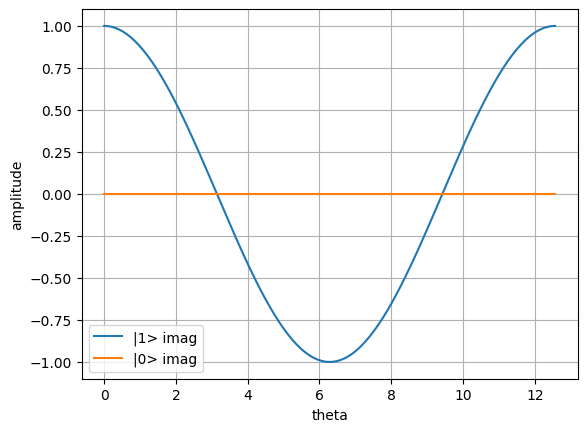

In [62]:
#Codercise I.6.2 - Plotting RX

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #

    qml.RX(theta, wires=0)
    ##################

    # APPLY RX(theta) AND RETURN THE STATE

    return qml.state()


# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])

#plot = plotter(angles, output_states) # this piece of code is used on pennylane but doesn't work on my computer. 

plt.plot(angles, output_states) # this is a replacement code for above. 
plt.xlabel("theta")
plt.ylabel("amplitude")
plt.legend(["|1> imag","|0> imag"])
plt.grid()

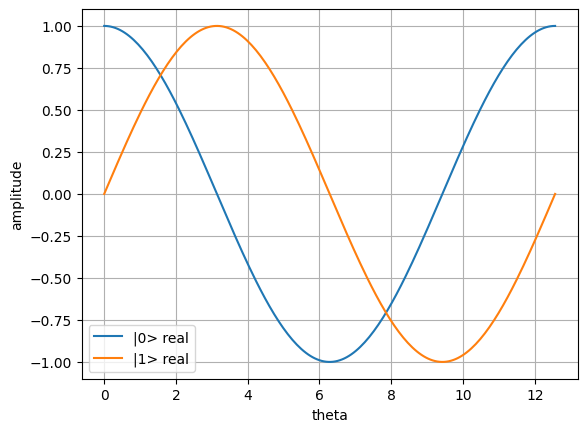

In [64]:
#Codercise I.6.3 - PLotting RY

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_ry(theta, state):
    """Apply an RY gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #

    qml.RY(theta, wires=0)
    ##################

    # APPLY RY(theta) AND RETURN THE STATE

    return qml.state()


# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_ry(t, 0) for t in angles])

#plot = plotter(angles, output_states)
plt.plot(angles, output_states)
plt.xlabel("theta")
plt.ylabel("amplitude")
plt.grid()
plt.legend(["|0> real","|1> real"])



<h1>Single-Qubit Gates - Universal Gate Sets<h1>

In [28]:
#Codercise I.7.1 - Universality of rotations

dev = qml.device("default.qubit", wires=1)

##################
# YOUR CODE HERE #
##################

# ADJUST THE VALUES OF PHI, THETA, AND OMEGA
phi, theta, omega = np.pi/2, np.pi/2, np.pi/2


@qml.qnode(dev)
def hadamard_with_rz_rx():
    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
    return qml.state()


In [29]:
#Codercise I.7.2 - Synthesizing a circuit

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def convert_to_rz_rx():
    ##################
    # YOUR CODE HERE #

    qml.RZ(np.pi/2, wires=0)
    qml.RX(np.pi/2, wires=0)
    #qml.RZ((5/4) * np.pi, wires= 0)
    qml.RZ(np.pi/2, wires=0)

    qml.RZ(np.pi/2, wires=0)
    
    qml.RZ(-np.pi/4, wires=0)

    qml.RZ(np.pi, wires=0)
    qml.RX(np.pi, wires=0)

    
    ##################

    # IMPLEMENT THE CIRCUIT IN THE PICTURE USING ONLY RZ AND RX

    return qml.state()


In [30]:
#Codercise I.7.3 - Universality of H and T

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def unitary_with_h_and_t():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY ONLY H AND T TO PRODUCE A CIRCUIT THAT EFFECTS THE GIVEN MATRIX
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)

    return qml.state()


<h1>Single-Qubit Gates - Prepare Yourself<h1>

In [31]:
#Codercise I.8.1 - State Preperation

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #

    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)

    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE

    return qml.state()


In [32]:
#Codercise I.8.2 - State Preparation revisited

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################
    qml.RX(np.pi/3, wires=0)

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE

    return qml.state()


In [33]:
#Codercise I.8.3 - State Preparation with Mottonnen's method

v = np.array([0.52889389 - 0.14956775j, 0.67262317 + 0.49545818j])

##################
# YOUR CODE HERE #

dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
##################

# CREATE A DEVICE


# CONSTRUCT A QNODE THAT USES qml.MottonenStatePreparation
# TO PREPARE A QUBIT IN STATE V, AND RETURN THE STATE


def prepare_state(state=v):

    qml.MottonenStatePreparation(state_vector = state, wires=0)

    return qml.state()


# This will draw the quantum circuit and allow you to inspect the output gates
print(prepare_state(v))
print()
print(qml.draw(prepare_state, expansion_strategy="device")(v))


[0.52889389-0.14956775j 0.67262317+0.49545818j]

0: ──RY(1.98)──RZ(0.91)──GlobalPhase(-0.18)─┤  State


<h1>Single-Qubit Gates - Measurements<h1>

In [34]:
#Codercise I.9.1 - Measuring a Superposition

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_h_and_measure(state):
    """Complete the function such that we apply the Hadamard gate
    and measure in the computational basis.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise leave it in state 0.

    Returns:
        np.array[float]: The measurement outcome probabilities.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    qml.Hadamard(wires=0)
    ##################

    # APPLY HADAMARD AND MEASURE

    return qml.probs(wires=0)


print(apply_h_and_measure(0))
print(apply_h_and_measure(1))


[0.5 0.5]
[0.5 0.5]


In [35]:
#Codercise I.9.2 - Y basis rotation

##################
# YOUR CODE HERE #
##################


# WRITE A QUANTUM FUNCTION THAT PREPARES (1/2)|0> + i(sqrt(3)/2)|1>
def prepare_psi():

    qml.MottonenStatePreparation(state_vector=np.array([1/2, 1j*np.sqrt(3)/2]),wires=0)
    
    pass


# WRITE A QUANTUM FUNCTION THAT SENDS BOTH |0> TO |y_+> and |1> TO |y_->
def y_basis_rotation():
    qml.Hadamard(wires=0)
    qml.S(wires=0)
    pass


In [36]:
#Codercise I.9.3 - Measurement in the Y basis

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def measure_in_y_basis():
    ##################
    # YOUR CODE HERE #

    prepare_psi()
    qml.adjoint(y_basis_rotation)()


    ##################

    # PREPARE THE STATE

    # PERFORM THE ROTATION BACK TO COMPUTATIONAL BASIS

    # RETURN THE MEASUREMENT OUTCOME PROBABILITIES

    return qml.probs(wires=0)


print(measure_in_y_basis())


[0.9330127 0.0669873]


<h1>Single-Qubit Gates - What did you Expect?<h1>

In [37]:
#Codercise I.10.1 - Measurement of the PauliY observable

dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def circuit():
    ##################
    # YOUR CODE HERE #

    qml.RX(np.pi/4, wires=0)
    qml.Hadamard(wires=0)
    qml.Z(wires=0)
    
    ##################

    # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y

    return qml.expval(qml.PauliY(wires=0))


print(circuit())


-0.7071067811865471


In [38]:
#Codercise I.10.2 - Setting up the number of experiment shots

# An array to store your results
shot_results = []

# Different numbers of shots
shot_values = [100, 1000, 10000, 100000, 1000000]

for shots in shot_values:
    ##################
    # YOUR CODE HERE #

    dev = qml.device("default.qubit", wires=1, shots=shots)
    
    @qml.qnode(dev)

    def circuit():
        qml.RX(np.pi/4, wires=0)
        qml.Hadamard(wires=0)
        qml.Z(wires=0)
    
        return qml.expval(qml.PauliY(wires=0))
    ##################
    shot_results.append(circuit())
    # CREATE A DEVICE, CREATE A QNODE, AND RUN IT

    # STORE RESULT IN SHOT_RESULTS ARRAY
    pass

print(qml.math.unwrap(shot_results))


[-0.74, -0.73, -0.71, -0.70888, -0.708186]


In [39]:
#Codercise I.10.3 - Evaluating the samples

dev = qml.device("default.qubit", wires=1, shots=100000)


@qml.qnode(dev)
def circuit():
    qml.RX(np.pi / 4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # RETURN THE MEASUREMENT SAMPLES OF THE CORRECT OBSERVABLE

    return qml.sample(qml.PauliY(wires=0))


def compute_expval_from_samples(samples):
    """Compute the expectation value of an observable given a set of
    sample outputs. You can assume that there are two possible outcomes,
    1 and -1.

    Args:
        samples (np.array[float]): 100000 samples representing the results of
            running the above circuit.

    Returns:
        float: the expectation value computed based on samples.
    """

    estimated_expval = 0

    ##################
    # YOUR CODE HERE #

    
    ##################

    # USE THE SAMPLES TO ESTIMATE THE EXPECTATION VALUE

    return np.mean(samples) # just taking the avg value here. avg of +1 and avg of -1. 


samples = circuit()
print(compute_expval_from_samples(samples))


-0.70734


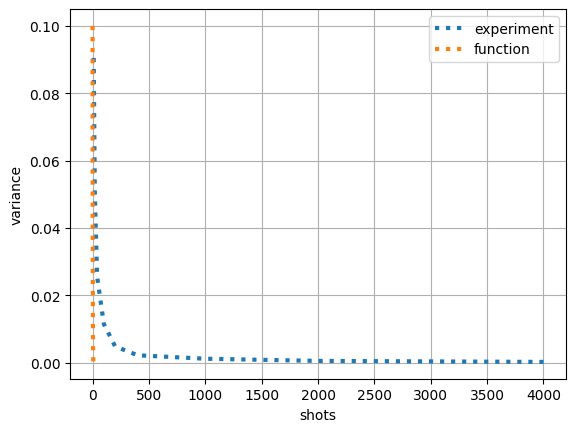

In [81]:
#Codercise I.10.4 - The Variance of sample measurements

def variance_experiment(n_shots):
    """Run an experiment to determine the variance in an expectation
    value computed with a given number of shots.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we obtain running the
        circuit 100 times with n_shots shots each.
    """

    # To obtain a variance, we run the circuit multiple times at each shot value.
    n_trials = 100

    ##################
    # YOUR CODE HERE #

    dev = qml.device("default.qubit", wires= 0, shots = n_shots)
    @qml.qnode(dev)
    ##################

    # CREATE A DEVICE WITH GIVEN NUMBER OF SHOTS

    # DECORATE THE CIRCUIT BELOW TO CREATE A QNODE

    def circuit():
        qml.Hadamard(wires=0)
        return qml.expval(qml.PauliZ(wires=0))

    # RUN THE QNODE N_TRIALS TIMES AND RETURN THE VARIANCE OF THE RESULTS

    results = [circuit().numpy() for _ in range(n_trials)]

    return np.var(results)


def variance_scaling(n_shots):
    """Once you have determined how the variance in expectation value scales
    with the number of shots, complete this function to programmatically
    represent the relationship.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we expect to see when we run
        an experiment with n_shots shots.
    """

    estimated_variance = 0

    ##################
    # YOUR CODE HERE #
    ##################

    # ESTIMATE THE VARIANCE BASED ON SHOT NUMBER
    return 1/n_shots


# Various numbers of shots; you can change this
shot_vals = [10, 20, 40, 100, 200, 400, 1000, 2000, 4000]

# Used to plot your results
results_experiment = [variance_experiment(shots) for shots in shot_vals]
results_scaling = [variance_scaling(shots) for shots in shot_vals]
#plot = plotter(shot_vals, results_experiment, results_scaling)

plt.plot(shot_vals, results_experiment, results_scaling, linestyle="dotted", linewidth=3)
plt.legend(["experiment","function"])
plt.xlabel("shots")
plt.ylabel("variance")
plt.grid()

<h1>Circuit with Many Qubits - Multi-Qubit Systems<h1>

In [41]:
#Codercise I.11.1 - Prearing basis state
num_wires = 3
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def make_basis_state(basis_id):
    """Produce the 3-qubit basis state corresponding to |basis_id>.

    Note that the system starts in |000>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        np.array[complex]: The computational basis state |basis_id>.
    """

    ##################
    # YOUR CODE HERE #
    string = "{0:03b}".format(basis_id)#convert to binary
    print(string)
    if string[0] == "1":
        qml.PauliX(wires=0)
    if string[1] == "1":
        qml.PauliX(wires=1)
    if string[2] == "1":
        qml.PauliX(wires=2)
        
    ##################

    # CREATE THE BASIS STATE

    return qml.state()


basis_id = 3
print(f"Output state = {make_basis_state(basis_id)}")


011
Output state = [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [42]:
#Codercise I.11.2 - Separable Operations

# Creates a device with *two* qubits
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def two_qubit_circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |+>|1>

    qml.Hadamard(wires=0)
    qml.PauliX(wires=1)
    

    # RETURN TWO EXPECTATION VALUES, Y ON FIRST QUBIT, Z ON SECOND QUBIT

    return qml.expval(qml.PauliY(wires=0)), qml.expval(qml.PauliZ(wires=1))


print(two_qubit_circuit())


(tensor(0., requires_grad=True), tensor(-1., requires_grad=True))


In [43]:
#Codercise I.11.3 - Expectation value oftwo-qubit observable

dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def create_one_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |1>|->

    qml.PauliX(wires=0)
    qml.PauliX(wires=1)

    qml.Hadamard(wires=1)


    # RETURN A SINGLE EXPECTATION VALUE Z \otimes X

    return qml.expval(qml.PauliZ(wires=0) @ qml.PauliX(wires=1))


print(create_one_minus())


0.9999999999999996


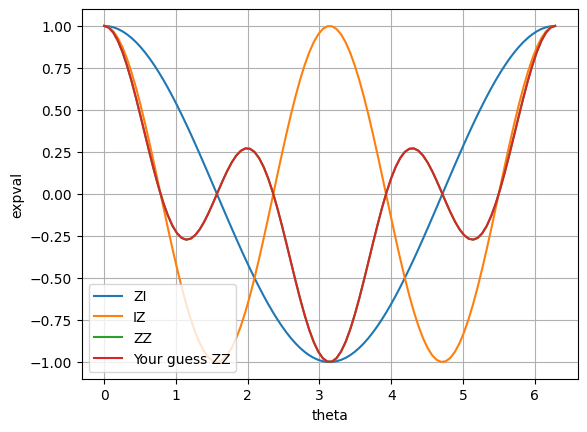

In [101]:
#Codercise I.11.4 - Doubel Trouble
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def circuit_1(theta):
    """Implement the circuit and measure Z I and I Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float, float: The expectation values of the observables Z I, and I Z
    """
    ##################
    # YOUR CODE HERE #
    qml.RX(theta, wires=0)
    qml.RY(2*theta, wires=1)
    ##################

    return qml.expval(qml.PauliZ(wires=0)), qml.expval( qml.PauliZ(wires=1))


@qml.qnode(dev)
def circuit_2(theta):
    """Implement the circuit and measure Z Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float: The expectation value of the observable Z Z
    """

    ##################
    # YOUR CODE HERE #
    qml.RX(theta, wires=0)
    qml.RY(2*theta, wires=1)
    ##################

    return qml.expval(qml.PauliZ(wires=0) @ qml.PauliZ(wires=1))


def zi_iz_combination(ZI_results, IZ_results):
    """Implement a function that acts on the ZI and IZ results to
    produce the ZZ results. How do you think they should combine?

    Args:
        ZI_results (np.array[float]): Results from the expectation value of
            ZI in circuit_1.
        IZ_results (np.array[float]): Results from the expectation value of
            IZ in circuit_2.

    Returns:
        np.array[float]: A combination of ZI_results and IZ_results that
        produces results equivalent to measuring ZZ.
    """

    combined_results = np.zeros(len(ZI_results))

    ##################
    # YOUR CODE HERE #
    ##################

    return ZI_results * IZ_results


theta = np.linspace(0, 2 * np.pi, 100)

# Run circuit 1, and process the results
circuit_1_results = np.array([circuit_1(t) for t in theta])

ZI_results = circuit_1_results[:, 0]
IZ_results = circuit_1_results[:, 1]
combined_results = zi_iz_combination(ZI_results, IZ_results)

# Run circuit 2
ZZ_results = np.array([circuit_2(t) for t in theta])

# Plot your results
#plot = plotter(theta, ZI_results, IZ_results, ZZ_results, combined_results)

#plt.plot(theta, ZI_results, IZ_results, ZZ_results, combined_results)
plt.plot(theta, ZI_results, label="ZI")
plt.plot(theta, IZ_results, label="IZ")
plt.plot(theta, ZZ_results, label="ZZ") 
plt.plot(theta, combined_results, label="Your guess ZZ")

plt.xlabel("theta")
plt.ylabel("expval")
plt.legend()
plt.grid()


<h1>Circuits with Many Qubits - All Tied Up<h1>

In [45]:
#Codercise I.12.1 - Entangling Operations

num_wires = 2
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def apply_cnot(basis_id):
    """Apply a CNOT to |basis_id>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        np.array[complex]: The resulting state after applying CNOT|basis_id>.
    """

    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisStatePreparation(bits, wires=[0, 1])

    ##################
    # YOUR CODE HERE #

    qml.CNOT(wires=[0,1])
    ##################

    # APPLY THE CNOT

    return qml.state()


##################
# YOUR CODE HERE #


##################

# REPLACE THE BIT STRINGS VALUES BELOW WITH THE CORRECT ONES
cnot_truth_table = {"00": "00", "01": "01", "10": "11", "11": "10"}


# Run your QNode with various inputs to help fill in your truth table
print(apply_cnot(0))


[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [46]:
#Codercise I.12.2 - Separable or entangled?

dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def apply_h_cnot():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE OPERATIONS IN THE CIRCUIT

    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])

    return qml.state()


print(apply_h_cnot())

##################
# YOUR CODE HERE #
##################

# SET THIS AS 'separable' OR 'entangled' BASED ON YOUR OUTCOME
state_status = "entangled"


[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [47]:
#Codercise I.12.3  - Controlled rotations
dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def controlled_rotations(theta, phi, omega):
    """Implement the circuit above and return measurement outcome probabilities.

    Args:
        theta (float): A rotation angle
        phi (float): A rotation angle
        omega (float): A rotation angle

    Returns:
        np.array[float]: Measurement outcome probabilities of the 3-qubit
        computational basis states.
    """

    ##################
    # YOUR CODE HERE #

    qml.Hadamard(wires=0)
    qml.CRX(theta, wires=[0,1])
    qml.CRY(phi, wires=[1,2])
    qml.CRZ(omega, wires=[2,0])
    ##################

    # APPLY THE OPERATIONS IN THE CIRCUIT AND RETURN MEASUREMENT PROBABILITIES

    return qml.probs()


theta, phi, omega = 0.1, 0.2, 0.3
print(controlled_rotations(theta, phi, omega))


[5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.98751041e-01 0.00000000e+00 1.23651067e-03 1.24480103e-05]


<h1>Circuit with Many Qubits - We've Got it Under Control<h1>

In [50]:
def prepare_states(phi, theta, omega):
    qml.RY(phi, wires=0)
    qml.RY(theta, wires=1)
    qml.RY(omega, wires=0)

# this is a random prepare_states() fucntion that I created to make the cell before work. 

In [53]:
#Codercise I.13.1 - The imposter CZ

dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(device=dev)
def true_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    qml.CZ(wires=[0,1])
    ##################

    # IMPLEMENT THE REGULAR CZ GATE HERE

    return qml.state()


@qml.qnode(dev)
def imposter_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0,1])
    qml.Hadamard(wires=1)
    
    ##################

    # IMPLEMENT CZ USING ONLY H AND CNOT

    return qml.state()


print(f"True CZ output state {true_cz(phi, theta, omega)}")
print(f"Imposter CZ output state {imposter_cz(phi, theta, omega)}")



True CZ output state [-0.27216539+0.j -0.60815273+0.j  0.30461121+0.j -0.68065283+0.j]
Imposter CZ output state [-0.27216539+0.j -0.60815273+0.j  0.30461121+0.j -0.68065283+0.j]


In [54]:
#codercise I.13.2 - The SWAP Gate

dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(dev)
def apply_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #

    qml.SWAP(wires=[0,1])

    ##################

    # IMPLEMENT THE REGULAR SWAP GATE HERE

    return qml.state()


@qml.qnode(dev)
def apply_swap_with_cnots(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,0])
    qml.CNOT(wires=[0,1])
    ##################

    # IMPLEMENT THE SWAP GATE USING A SEQUENCE OF CNOTS

    return qml.state()


print(f"Regular SWAP state = {apply_swap(phi, theta, omega)}")
print(f"CNOT SWAP state = {apply_swap_with_cnots(phi, theta, omega)}")


Regular SWAP state = [-0.27216539+0.j  0.30461121+0.j -0.60815273+0.j  0.68065283+0.j]
CNOT SWAP state = [-0.27216539+0.j  0.30461121+0.j -0.60815273+0.j  0.68065283+0.j]


In [55]:
#Codercise I.13.3 - The Toffoli Gate

dev = qml.device("default.qubit", wires=3)

# Prepare first qubit in |1>, and arbitrary states on the second two qubits
phi, theta, omega = 1.2, 2.3, 3.4


# A helper function just so you can visualize the initial state
# before the controlled SWAP occurs.
@qml.qnode(dev)
def no_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)
    return qml.state()


@qml.qnode(dev)
def controlled_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # PERFORM A CONTROLLED SWAP USING A SEQUENCE OF TOFFOLIS
    #qml.CSWAP(wires=[0,1,2])

    qml.Toffoli(wires=[0,1,2])

    qml.Toffoli(wires=[0,2,1])

    qml.Toffoli(wires=[0,1,2])

    return qml.state()


print(no_swap(phi, theta, omega))
print(controlled_swap(phi, theta, omega))


[-0.27216539+0.j  0.        +0.j -0.60815273+0.j  0.        +0.j
  0.30461121+0.j  0.        +0.j  0.68065283+0.j  0.        +0.j]
[-0.27216539+0.j  0.        +0.j -0.60815273+0.j  0.        +0.j
  0.30461121+0.j  0.68065283+0.j  0.        +0.j  0.        +0.j]


In [56]:
# Codercise I.13.4 - Mixed Controlled Gates

dev = qml.device("default.qubit", wires=4)


@qml.qnode(dev)
def four_qubit_mcx():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT ABOVE USING A 4-QUBIT MULTI-CONTROLLED X

    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)

    qml.MultiControlledX(control_wires=[0,1,2,], wires=3, control_values="001")
    return qml.state()


print(four_qubit_mcx())


[0.35355339+0.j 0.        +0.j 0.        +0.j 0.35355339+0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j]


/Users/heinliao/Programming/Quantum_Computing/miniconda3/lib/python3.12/site-packages/pennylane/ops/op_math/controlled_ops.py:1045: PennyLaneDeprecationWarning: Specifying control values using a bitstring is deprecated, and will not be supported in future releases, Use a list of booleans or integers instead.
  warnings.warn(
/Users/heinliao/Programming/Quantum_Computing/miniconda3/lib/python3.12/site-packages/pennylane/ops/op_math/controlled_ops.py:1051: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


In [57]:
#Codercise I.13.5 - The 3-controlled-NOT

# Wires 0, 1, 2 are the control qubits
# Wire 3 is the auxiliary qubit
# Wire 4 is the target
dev = qml.device("default.qubit", wires=5)


@qml.qnode(dev)
def four_qubit_mcx_only_tofs():
    # We will initialize the control qubits in state |1> so you can see
    # how the output state gets changed.
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.PauliX(wires=2)

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Toffoli(wires=[0,1,3])
    qml.Toffoli(wires=[2,3,4])
    qml.Toffoli(wires=[0,1,3])
    #qml.Toffoli(wires=[1,2,3])
    # IMPLEMENT A 3-CONTROLLED NOT WITH TOFFOLIS

    return qml.state()


# print(four_qubit_mcx_only_tofs())



<h1>Circuit with Many Qubits - Multi-Qubit Gate Challenge<h1>

In [58]:
#Codercise I.14.1 - The Bell States

dev = qml.device("default.qubit", wires=2)

# Starting from the state |00>, implement a PennyLane circuit
# to construct each of the Bell basis states.


@qml.qnode(dev)
def prepare_psi_plus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE (1/sqrt(2)) (|00> + |11>)

    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])

    return qml.state()


@qml.qnode(dev)
def prepare_psi_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE (1/sqrt(2)) (|00> - |11>)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    qml.CNOT(wires=[0,1])


    return qml.state()


@qml.qnode(dev)
def prepare_phi_plus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE  (1/sqrt(2)) (|01> + |10>)
    qml.Hadamard(wires=0)

    qml.CNOT(wires=[0,1])
    qml.PauliX(wires=0)

    return qml.state()


@qml.qnode(dev)
def prepare_phi_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE  (1/sqrt(2)) (|01> - |10>)

    qml.Hadamard(wires=0)

    qml.CNOT(wires=[0,1])
    qml.PauliX(wires=0)
    qml.PauliZ(wires=0)


    return qml.state()


psi_plus = prepare_psi_plus()
psi_minus = prepare_psi_minus()
phi_plus = prepare_phi_plus()
phi_minus = prepare_phi_minus()

# Uncomment to print results
# print(f"|ψ_+> = {psi_plus}")
# print(f"|ψ_-> = {psi_minus}")
# print(f"|ϕ_+> = {phi_plus}")
# print(f"|ϕ_-> = {phi_minus}")


In [59]:
#Codercise I.14.2 - Quantum Multiplexer

dev = qml.device("default.qubit", wires=3)

# State of first 2 qubits
state = [0, 1]


@qml.qnode(device=dev)
def apply_control_sequence(state):
    # Set up initial state of the first two qubits
    if state[0] == 1:
        qml.PauliX(wires=0)
    if state[1] == 1:
        qml.PauliX(wires=1)

    # Set up initial state of the third qubit - use |->
    # so we can see the effect on the output
    qml.PauliX(wires=2)
    qml.Hadamard(wires=2)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE MULTIPLEXER
    # IF STATE OF FIRST TWO QUBITS IS 01, APPLY X TO THIRD QUBIT

    qml.PauliX(wires=0)
    qml.Toffoli(wires=[0,1,2])
    qml.PauliX(wires=0)


    # IF STATE OF FIRST TWO QUBITS IS 10, APPLY Z TO THIRD QUBIT

    qml.PauliX(wires=1)
    qml.Hadamard(wires=2)
    qml.Toffoli(wires=[0,1,2])
    qml.Hadamard(wires=2)
    qml.PauliX(wires=1)
    

    # IF STATE OF FIRST TWO QUBITS IS 11, APPLY Y TO THIRD QUBIT

    qml.Hadamard(wires=2)
    qml.S(wires=2)
    qml.Toffoli(wires=[0,1,2])
    qml.adjoint(qml.S)(wires=2)
    qml.Hadamard(wires=2)

    return qml.state()


print(apply_control_sequence(state))


[ 0.        +0.j  0.        +0.j -0.70710678+0.j  0.70710678+0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
